In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from PIL import Image

(200, 200, 4)


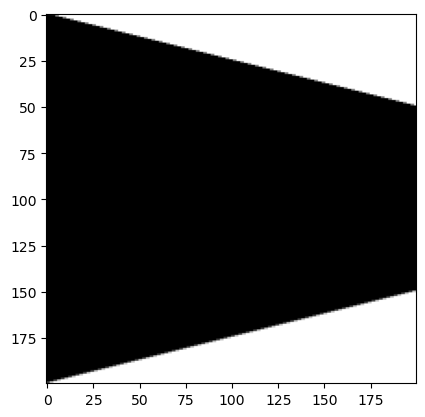

(200, 200, 4)


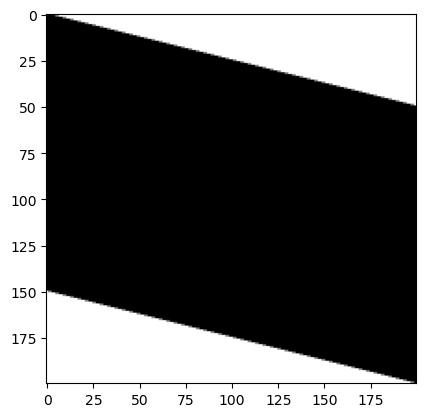

(300, 200, 4)


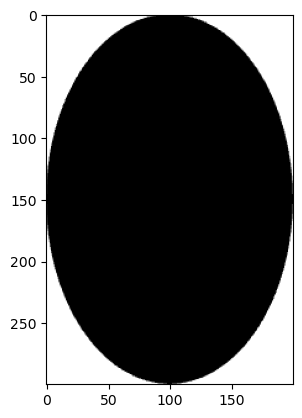

(200, 200, 4)


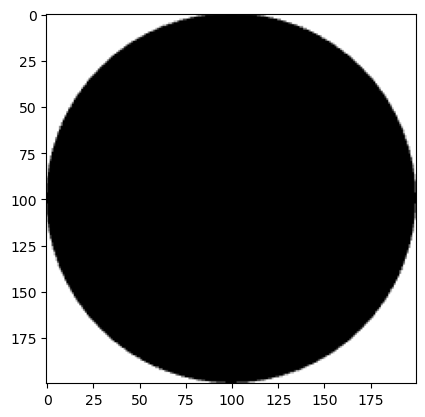

(200, 300, 4)


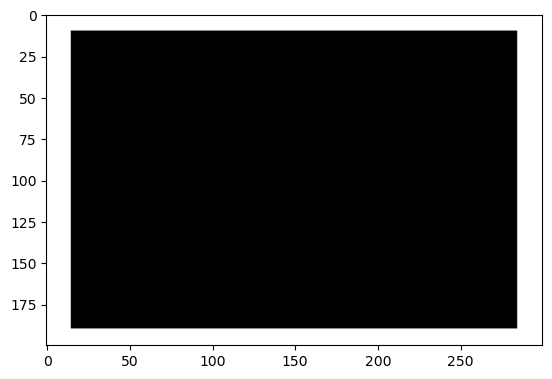

(300, 200, 4)


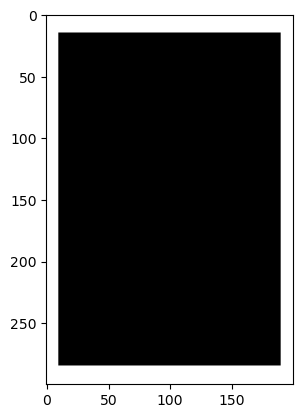

(200, 200, 4)


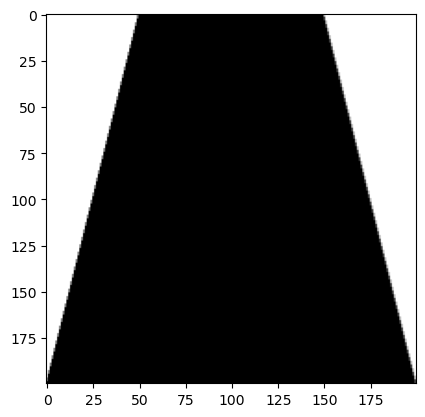

(200, 300, 4)


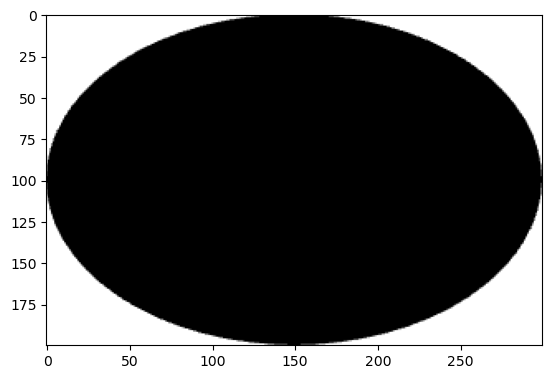

(200, 200, 4)


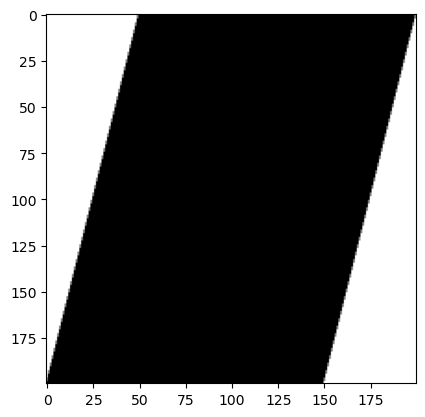

(200, 200, 4)


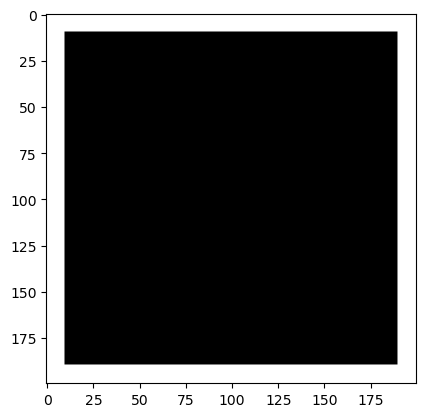

In [3]:
path = './Person//1xShapes/*'
arr = []
for p in glob.glob(path):
#     img=cv2.imread(p,cv2.IMREAD_UNCHANGED)
    img = Image.open(p)
    print(np.asarray(img).shape)
    arr.append(np.asarray(img))
    plt.imshow(img,cmap='gray')
    plt.show()
#     break

In [4]:
from PIL import Image

def calculate_black_to_white_ratio(image_path):
    try:
        # Load the image
        image = Image.open(image_path)

        # Convert the image to RGBA mode to include alpha (transparency) channel
        image = image.convert("RGBA")

        # Get pixel data
        pixels = list(image.getdata())

        # Count black (0) and white (255) pixels while excluding transparent pixels
        black_pixels = 0
        white_pixels = 0

        for pixel in pixels:
            r, g, b, a = pixel
            if a > 0:  # Exclude transparent pixels
                if r == 0 and g == 0 and b == 0:
                    black_pixels += 1
                elif r == 255 and g == 255 and b == 255:
                    white_pixels += 1

        # Calculate the ratio
        if white_pixels == 0:
            ratio = 0  # To avoid division by zero
        else:
            ratio = max(black_pixels / white_pixels, white_pixels/black_pixels )

        return black_pixels, white_pixels, ratio

    except Exception as e:
        return None




In [5]:
final= []
path = './Vrinda/3xShapes/*'
for p in glob.glob(path):
    result = calculate_black_to_white_ratio(p)

    if result:
        black_pixels, white_pixels, ratio = result
        res = {'Path':p,'Black':black_pixels,'White':white_pixels,'Ratio':ratio}
        final.append(res)
        print(p)
        print(f"Black Pixels: {black_pixels}")
        print(f"White Pixels: {white_pixels}")
        print(f"Black to White Ratio: {ratio:.2f}")
        print()
    else:
        print("Error loading the image or calculating the ratio.")

./Vrinda/3xShapes/circle_3x.png
Black Pixels: 133615
White Pixels: 148532
Black to White Ratio: 1.11

./Vrinda/3xShapes/square_3x.png
Black Pixels: 145077
White Pixels: 144476
Black to White Ratio: 1.00

./Vrinda/3xShapes/ellipse_angle_90_3x.png
Black Pixels: 206607
White Pixels: 216967
Black to White Ratio: 1.05

./Vrinda/3xShapes/rectangle_angle_0_3x.png
Black Pixels: 218313
White Pixels: 216551
Black to White Ratio: 1.01

./Vrinda/3xShapes/ellipse_angle_0_3x.png
Black Pixels: 213963
White Pixels: 208795
Black to White Ratio: 1.02

./Vrinda/3xShapes/trapezium_angle_0_3x.png
Black Pixels: 135754
White Pixels: 133505
Black to White Ratio: 1.02

./Vrinda/3xShapes/parallelogram_angle_0_3x.png
Black Pixels: 133916
White Pixels: 134700
Black to White Ratio: 1.01

./Vrinda/3xShapes/parallelogram_angle_90_3x.png
Black Pixels: 142186
White Pixels: 127220
Black to White Ratio: 1.12

./Vrinda/3xShapes/trapezium_angle_90_3x.png
Black Pixels: 90331
White Pixels: 178158
Black to White Ratio: 1.97


In [6]:
import pandas as pd
pd.DataFrame(final)

,Path,Black,White,Ratio
0,./Vrinda/3xShapes/circle_3x.png,133615,148532,1.111642
1,./Vrinda/3xShapes/square_3x.png,145077,144476,1.004160
2,./Vrinda/3xShapes/ellipse_angle_90_3x.png,206607,216967,1.050144
3,./Vrinda/3xShapes/rectangle_angle_0_3x.png,218313,216551,1.008137
4,./Vrinda/3xShapes/ellipse_angle_0_3x.png,213963,208795,1.024752
5,./Vrinda/3xShapes/trapezium_angle_0_3x.png,135754,133505,1.016846
6,./Vrinda/3xShapes/parallelogram_angle_0_3x.png,133916,134700,1.005854
7,./Vrinda/3xShapes/parallelogram_angle_90_3x.png,142186,127220,1.117639
8,./Vrinda/3xShapes/trapezium_angle_90_3x.png,90331,178158,1.972280
9,./Vrinda/3xShapes/rectangle_angle_90_3x.png,225466,210332,1.071953
